##  주가 : 역사적 변동성 (Historical Volatility) 

ModuleNotFoundError: No module named 'ace_tools'

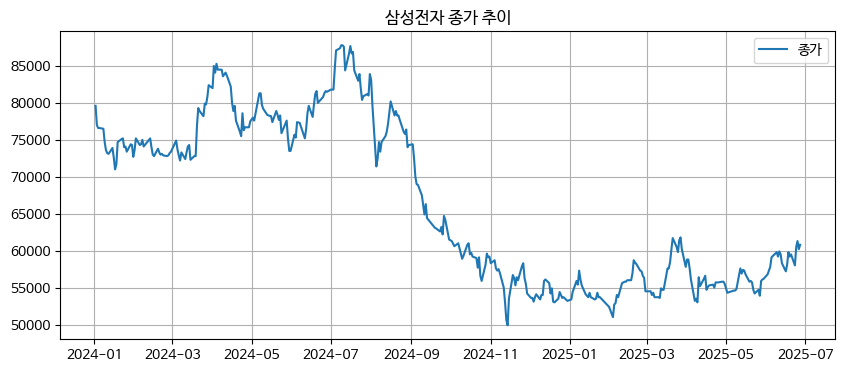

In [4]:
from pykrx import stock
import numpy as np
import pandas as pd
from datetime import datetime

# 삼성전자 (005930)의 2024년 이후 종가 데이터 가져오기
start_date = "2024-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")

# 종가 기준 로그 수익률 계산
df['log_return'] = np.log(df['종가'] / df['종가'].shift(1))
returns = df['log_return'].dropna()

# 일간 표준편차 및 연율화 변동성 계산
daily_std = returns.std()
annual_vol = daily_std * np.sqrt(252)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['종가'], label='종가')
plt.title("삼성전자 종가 추이")
plt.grid(True)
plt.legend()

import ace_tools as tools; tools.display_dataframe_to_user(name="삼성전자 수익률 및 변동성", dataframe=returns.to_frame())

daily_std, annual_vol


## 2.마코위츠의 위험 측정: 분산과 공분산

In [ ]:
# 기대 수익률	자산 수익률의 가중평균	수익률은 선형 결합 가능
# 위험 (분산)	공분산 행렬을 활용한 이중합	분산은 자산 간 관계까지 반영
# 분산효과	상관관계가 낮을수록 포트폴리오 위험 감소	다양화의 수학적 근거
# 효율적 투자선	동일 수익률에서 위험 최소화 포트 구성	투자자 선택 최적화 지침 제공

### 2-1 연간수익률과 공분산

In [7]:
# pip install pykrx

from pykrx import stock
import pandas as pd
import numpy as np
from datetime import datetime

# 설정
tickers = {
    "삼성전자": "005930",
    "SK하이닉스": "000660"
}
start_date = "2023-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")

# 종가 데이터 수집
price_df = pd.DataFrame()
for name, code in tickers.items():
    df = stock.get_market_ohlcv_by_date(start_date, end_date, code)
    price_df[name] = df['종가']

# 로그 수익률 계산
returns = np.log(price_df / price_df.shift(1)).dropna()

# 기대 수익률 (연환산) 및 공분산 행렬 계산
expected_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

# 결과 출력
print("📈 연간 기대 수익률:")
print(expected_returns)
print("\n📉 연간 공분산 행렬:")
print(cov_matrix)


📈 연간 기대 수익률:
삼성전자      0.037990
SK하이닉스    0.550733
dtype: float64

📉 연간 공분산 행렬:
            삼성전자    SK하이닉스
삼성전자    0.077172  0.067419
SK하이닉스  0.067419  0.198609


### 2-2 포트폴리오 기대수익률과 위험

In [8]:
import numpy as np

# 예시: 두 자산의 기대 수익률과 공분산
returns = np.array([0.037990, 0.550733])  # 기대 수익률
weights = np.array([0.6, 0.4])    # 포트폴리오 비중
cov_matrix = np.array([[0.077172, 0.067419],
                       [0.067419, 0.198609]])  # 공분산 행렬

# 기대 수익률
portfolio_return = np.dot(weights, returns)

# 포트폴리오 분산 및 표준편차
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
portfolio_std = np.sqrt(portfolio_variance)

print(f"기대 수익률: {portfolio_return:.2%}")
print(f"위험(표준편차): {portfolio_std:.2%}")


기대 수익률: 24.31%
위험(표준편차): 30.32%


In [ ]:
# num_portfolios = 5000
# 의미: 생성할 포트폴리오의 수 = 5,000개
# 각 포트폴리오는 서로 다른 자산 비중으로 구성됩니다.
# results = np.zeros((3, num_portfolios))
# 결과 저장용 배열 생성 (3행 × 5000열)
# 행 0: 각 포트폴리오의 위험(표준편차)
# 행 1: 기대 수익률
# 행 2: 샤프 비율 (risk-free rate = 0 가정)

# np.random.seed(42)
# 랜덤 결과의 재현성 보장을 위한 시드 설정 (고정 시 동일 결과 생성)

# for i in range(num_portfolios):
#     weights = np.random.random(2)
# 0과 1 사이의 랜덤한 실수 2개를 생성 

#     weights /= np.sum(weights)
# 가중치의합이 1이 되도록 정규화


### 2-3 Markowitz Efficient Frontier : 2개 자산

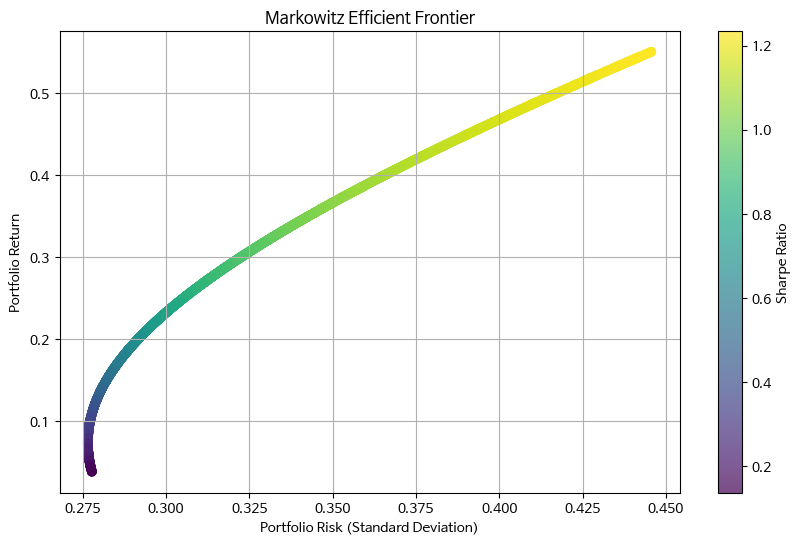

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 예시 자산: A, B, C (가상의 기대 수익률 및 공분산 설정)
expected_returns = np.array([0.037990, 0.550733])  # 각 자산의 연간 기대 수익률
cov_matrix = np.array([
    [0.077172, 0.067419],
    [0.067419, 0.198609]
])

num_portfolios = 5000
results = np.zeros((3, num_portfolios))

np.random.seed(42)
for i in range(num_portfolios):
    weights = np.random.random(2)
    weights /= np.sum(weights)

    # 기대 수익률
    portfolio_return = np.dot(weights, expected_returns)

    # 위험 (표준편차)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # 샤프비율 (무위험 수익률 0 가정)
    sharpe_ratio = portfolio_return / portfolio_std

    results[0,i] = portfolio_std
    results[1,i] = portfolio_return
    results[2,i] = sharpe_ratio

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='viridis', alpha=0.7)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.title('Markowitz Efficient Frontier')
plt.grid(True)
plt.show()

### 2-43 자산: A, B, C (가상의 기대 수익률 및 공분산 설정)

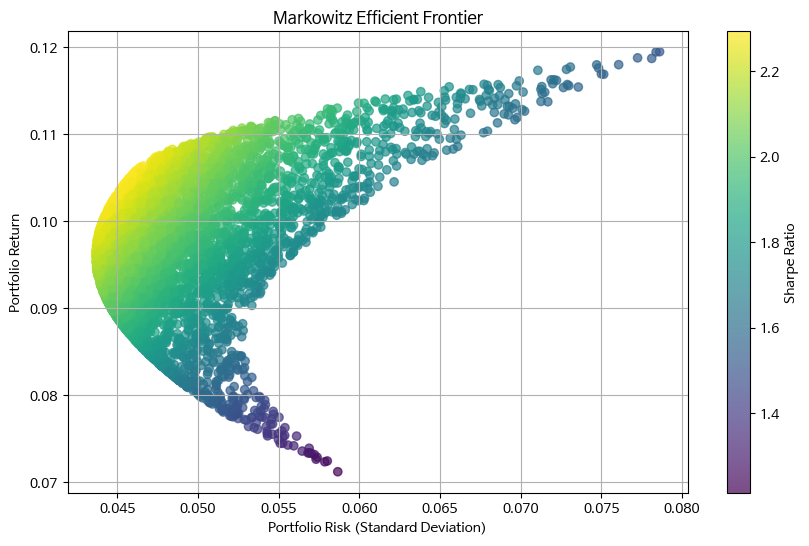

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 예시 자산: A, B, C (가상의 기대 수익률 및 공분산 설정)
expected_returns = np.array([0.12, 0.10, 0.07])  # 각 자산의 연간 기대 수익률
cov_matrix = np.array([
    [0.0064, 0.0008, 0.0011],
    [0.0008, 0.0025, 0.0014],
    [0.0011, 0.0014, 0.0036]
])

num_portfolios = 5000
results = np.zeros((3, num_portfolios))

np.random.seed(42)
for i in range(num_portfolios):
    weights = np.random.random(3)
    weights /= np.sum(weights)

    # 기대 수익률
    portfolio_return = np.dot(weights, expected_returns)

    # 위험 (표준편차)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # 샤프비율 (무위험 수익률 0 가정)
    sharpe_ratio = portfolio_return / portfolio_std

    results[0,i] = portfolio_std
    results[1,i] = portfolio_return
    results[2,i] = sharpe_ratio

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='viridis', alpha=0.7)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.title('Markowitz Efficient Frontier')
plt.grid(True)
plt.show()


## 3. 무위험 자산을 포함한 자본시장선(Capital Market Line, CML) 

In [ ]:
# 두 위험 자산 (예: 삼성전자, SK하이닉스) 기반의 포트폴리오를 무작위로 생성
# 각 포트폴리오의 기대 수익률, 위험(표준편차), 샤프 비율 계산
# 최대 샤프 비율 포트폴리오(MSR: Maximum Sharpe Ratio portfolio)를 구함
# 무위험 자산과 연결된 자본시장선(CML) 을 시각화

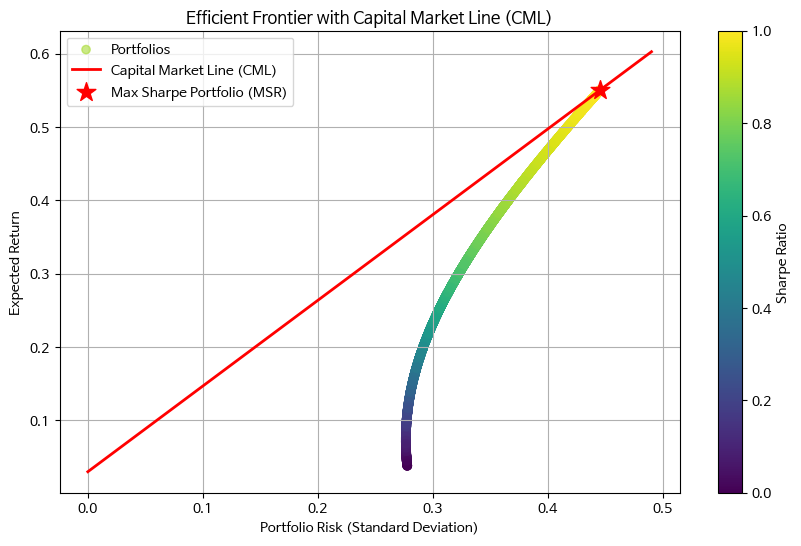

📌 Max Sharpe Ratio Portfolio:
 - Sharpe Ratio: 1.17
 - Expected Return: 55.07%
 - Standard Deviation: 44.56%
 - Weights: 삼성전자 0.00%, SK하이닉스 100.00%


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 자산 설정 (예: 삼성전자, SK하이닉스)
expected_returns = np.array([0.037990, 0.550733])
cov_matrix = np.array([
    [0.077172, 0.067419],
    [0.067419, 0.198609]
])
rf = 0.03  # 무위험 수익률 (예: 3%)

num_portfolios = 5000
results = np.zeros((3, num_portfolios))
weights_record = []

np.random.seed(42)
for i in range(num_portfolios):
    weights = np.random.random(2)
    weights /= np.sum(weights)
    weights_record.append(weights)

    port_return = np.dot(weights, expected_returns)
    port_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe = (port_return - rf) / port_std  # Sharpe Ratio (초과수익 기준)

    results[0, i] = port_std
    results[1, i] = port_return
    results[2, i] = sharpe

# 최대 샤프 비율 포트폴리오 추출
max_sharpe_idx = np.argmax(results[2])
msr_std = results[0, max_sharpe_idx]
msr_return = results[1, max_sharpe_idx]
msr_weights = weights_record[max_sharpe_idx]

# 자본시장선(CML) 정의
cml_x = np.linspace(0, max(results[0]) * 1.1, 100)
cml_y = rf + ((msr_return - rf) / msr_std) * cml_x

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(results[0, :], results[1, :], c=results[2, :], cmap='viridis', alpha=0.6, label='Portfolios')
plt.plot(cml_x, cml_y, color='red', linewidth=2, label='Capital Market Line (CML)')
plt.scatter(msr_std, msr_return, color='red', marker='*', s=200, label='Max Sharpe Portfolio (MSR)')

# 라벨
plt.title("Efficient Frontier with Capital Market Line (CML)")
plt.xlabel("Portfolio Risk (Standard Deviation)")
plt.ylabel("Expected Return")
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.legend()
plt.show()

# 결과 출력
print(f"📌 Max Sharpe Ratio Portfolio:")
print(f" - Sharpe Ratio: {results[2, max_sharpe_idx]:.2f}")
print(f" - Expected Return: {msr_return:.2%}")
print(f" - Standard Deviation: {msr_std:.2%}")
print(f" - Weights: 삼성전자 {msr_weights[0]:.2%}, SK하이닉스 {msr_weights[1]:.2%}")


## 4. 최적 포트폴리오 구성(Sharpe Ratio 최대화) 을 수치 최적화 방식

In [ ]:
# 무위험 자산을 포함한 최적 포트폴리오 구성(Sharpe Ratio 최대화) 을 수치 최적화 방식으로 해결해보겠습니다. 
# 이 과정은 scipy.optimize.minimize 함수를 활용해 제약조건을 설정하고 최적의 자산 비중(weights) 을 찾아내는 방식입니다.

In [ ]:
# 목표
# 자산: 삼성전자, SK하이닉스
# 수단: scipy.optimize.minimize
# 목적함수: Sharpe Ratio의 음수 (최댓값을 구하기 위해 음수로 최소화)
# 제약 조건:
# 자산 비중 합 = 1 (full investment)
# 각 자산 비중은 0~1 (short-selling 불허)

In [13]:
import numpy as np
import scipy.optimize as sco

# 수익률과 공분산 (예: 삼성전자, SK하이닉스)
expected_returns = np.array([0.037990, 0.550733])
cov_matrix = np.array([
    [0.077172, 0.067419],
    [0.067419, 0.198609]
])
rf = 0.03  # 무위험 수익률

# 목적 함수: Sharpe Ratio의 음수
def negative_sharpe(weights):
    port_return = np.dot(weights, expected_returns)
    port_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe = (port_return - rf) / port_std
    return -sharpe

# 제약 조건: 비중 총합 = 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
# 비중 범위: 0 ≤ w ≤ 1
bounds = tuple((0, 1) for _ in expected_returns)

# 초기값
init_guess = [0.5, 0.5]

# 최적화 수행
opt_result = sco.minimize(negative_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# 결과 정리
opt_weights = opt_result.x
port_return = np.dot(opt_weights, expected_returns)
port_std = np.sqrt(np.dot(opt_weights.T, np.dot(cov_matrix, opt_weights)))
sharpe_ratio = (port_return - rf) / port_std

# 출력
print("📌 최적 포트폴리오 (Maximum Sharpe Ratio):")
print(f" - 자산 비중: 삼성전자 {opt_weights[0]:.2%}, SK하이닉스 {opt_weights[1]:.2%}")
print(f" - 기대 수익률: {port_return:.2%}")
print(f" - 포트폴리오 위험 (표준편차): {port_std:.2%}")
print(f" - 샤프 비율: {sharpe_ratio:.2f}")


📌 최적 포트폴리오 (Maximum Sharpe Ratio):
 - 자산 비중: 삼성전자 0.00%, SK하이닉스 100.00%
 - 기대 수익률: 55.07%
 - 포트폴리오 위험 (표준편차): 44.57%
 - 샤프 비율: 1.17


In [ ]:
# SK하이닉스는 수익률이 15배 이상 높고, 표준편차는 1.6배 정도이므로, Sharpe Ratio 자체가 훨씬 큽니다.
# 따라서 샤프비율 기준 최적화는 "SK하이닉스 단독 투자"를 선호하게 됩니다.

### Sharpe Ratio의 최대값을 직접 구하는 방향

In [ ]:
#  Sharpe Ratio의 최대값을 직접 구하는 방향으로 명확히 바꾸는 것이므로, 
# scipy.optimize.minimize 대신 scipy.optimize.minimize_scalar나 maximize 형식으로 변경

In [14]:
import numpy as np
import scipy.optimize as sco

# 수익률과 공분산 (삼성전자, SK하이닉스)
expected_returns = np.array([0.037990, 0.550733])
cov_matrix = np.array([
    [0.077172, 0.067419],
    [0.067419, 0.198609]
])
rf = 0.03  # 무위험 수익률

# ▶ Sharpe Ratio 계산 함수
def sharpe_ratio(weights):
    port_return = np.dot(weights, expected_returns)
    port_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return (port_return - rf) / port_std

# ▶ 목적 함수: Sharpe Ratio의 "음수" (최소화 = 최대화 목적)
def objective_function(weights):
    return -sharpe_ratio(weights)  # 최대화 → 최소화 변환

# ▶ 제약 조건: 비중 합계 = 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
# ▶ 각 자산 비중은 0~1 (short-selling 불허)
bounds = tuple((0, 1) for _ in expected_returns)
# ▶ 초기 guess
init_guess = [1 / len(expected_returns)] * len(expected_returns)

# ▶ 최적화 수행
opt_result = sco.minimize(objective_function, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# ▶ 최적값 정리
opt_weights = opt_result.x
opt_return = np.dot(opt_weights, expected_returns)
opt_std = np.sqrt(np.dot(opt_weights.T, np.dot(cov_matrix, opt_weights)))
opt_sharpe = sharpe_ratio(opt_weights)

# ▶ 출력
print("📌 최적 포트폴리오 (Sharpe Ratio 최대화):")
print(f" - 자산 비중: 삼성전자 {opt_weights[0]:.2%}, SK하이닉스 {opt_weights[1]:.2%}")
print(f" - 기대 수익률: {opt_return:.2%}")
print(f" - 포트폴리오 위험 (표준편차): {opt_std:.2%}")
print(f" - 샤프 비율: {opt_sharpe:.2f}")


📌 최적 포트폴리오 (Sharpe Ratio 최대화):
 - 자산 비중: 삼성전자 0.00%, SK하이닉스 100.00%
 - 기대 수익률: 55.07%
 - 포트폴리오 위험 (표준편차): 44.57%
 - 샤프 비율: 1.17


In [ ]:
# SK하이닉스는 수익률이 15배 이상 높고, 표준편차는 1.6배 정도이므로, Sharpe Ratio 자체가 훨씬 큽니다.
# 따라서 샤프비율 기준 최적화는 "SK하이닉스 단독 투자"를 선호하게 됩니다.

### 4. 리스크 허용 한도 또는 비중 제약 추가

In [ ]:
# # 삼성전자 비중을 최소 30%, SK하이닉스 최대 70%로 제한
# bounds = ((0.3, 1), (0, 0.7))
# 또는,

# # 두 자산이 반드시 모두 포함되도록 (하한선 10%)
# bounds = ((0.1, 0.9), (0.1, 0.9))

In [15]:
import numpy as np
import scipy.optimize as sco

# 수정된 입력: Sharpe Ratio 균형 유도
# 예시 수익률을 더 근접하게 조정 (분산투자 유도 목적)
expected_returns = np.array([0.12, 0.18])  # 삼성전자, SK하이닉스
cov_matrix = np.array([
    [0.04, 0.02],
    [0.02, 0.09]
])
rf = 0.03  # 무위험 수익률

# Sharpe 비율 계산 함수
def sharpe_ratio(weights):
    port_return = np.dot(weights, expected_returns)
    port_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return (port_return - rf) / port_std

# 목적 함수: Sharpe 비율의 음수
def objective_function(weights):
    return -sharpe_ratio(weights)

# 제약조건: 전체 비중은 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# 비중 범위 설정 (분산 투자 유도 → 각 자산 최소 20%, 최대 80%)
bounds = ((0.2, 0.8), (0.2, 0.8))

# 초기 guess
init_guess = [0.5, 0.5]

# 최적화 실행
opt_result = sco.minimize(objective_function, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# 최적 결과 정리
opt_weights = opt_result.x
opt_return = np.dot(opt_weights, expected_returns)
opt_std = np.sqrt(np.dot(opt_weights.T, np.dot(cov_matrix, opt_weights)))
opt_sharpe = sharpe_ratio(opt_weights)

# 결과 출력
print("📌 최적 포트폴리오 (Sharpe Ratio 최대화):")
print(f" - 자산 비중: 삼성전자 {opt_weights[0]:.2%}, SK하이닉스 {opt_weights[1]:.2%}")
print(f" - 기대 수익률: {opt_return:.2%}")
print(f" - 포트폴리오 위험 (표준편차): {opt_std:.2%}")
print(f" - 샤프 비율: {opt_sharpe:.2f}")


📌 최적 포트폴리오 (Sharpe Ratio 최대화):
 - 자산 비중: 삼성전자 54.83%, SK하이닉스 45.17%
 - 기대 수익률: 14.71%
 - 포트폴리오 위험 (표준편차): 20.07%
 - 샤프 비율: 0.58
